# Exploratory Data Analysis
EDA

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
# reading dataset
titanic = pd.read_csv("titanic.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [7]:
titanic["Pclass"].unique()

array([3, 1, 2])

In [8]:
titanic["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [9]:
titanic["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [10]:
titanic["Survived"].unique()

array([0, 1])

In [11]:
titanic["Sex"].unique()

array(['male', 'female'], dtype=object)

# check duplicates

In [12]:
titanic.duplicated().sum()
# if duplicates present
# titanic.drop_duplicates(inplace = True)
# titanic = titanic.drop_duplicates()

0

# check missing values

In [13]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
titanic = titanic.drop("Cabin", axis = 1)

In [15]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [16]:
age_avg = titanic.Age.mean()
print(age_avg)


29.69911764705882


In [17]:
titanic["Age"].replace(np.nan, age_avg, inplace = True)
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [18]:
# for cateogorical columns -> mode/frequency
freq = titanic.Embarked.dropna().mode()[0]
print(freq)

S


In [19]:
titanic.Embarked.replace(np.nan, freq, inplace = True)
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# exploring

In [20]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


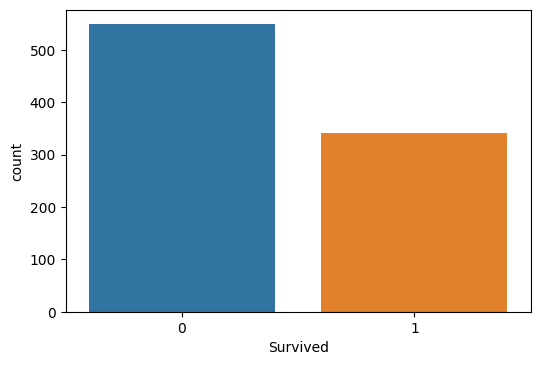

In [21]:
# checking dead and survived
plt.figure(dpi=100)
sns.countplot(x='Survived', data = titanic)

# survival based on sex

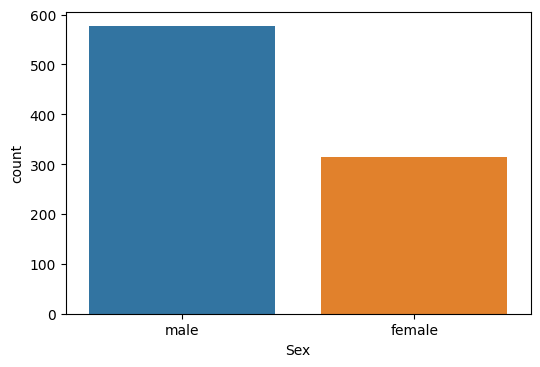

In [22]:
plt.figure(dpi=100)
sns.countplot(x='Sex', data = titanic)

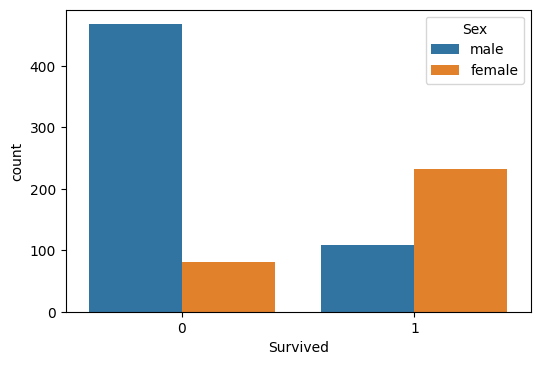

In [23]:
plt.figure(dpi=100)
sns.countplot(x='Survived', hue='Sex', data = titanic)

In [27]:
#plt.figure(dpi=100)
# survival rate for men
menSurvival = titanic[titanic.Sex == "male"]["Survived"]
menSurvivalRate = sum(menSurvival)/len(menSurvival) * 100
print(sum(menSurvival))
print(len(menSurvival))
print(menSurvivalRate)

109
577
18.890814558058924


In [25]:
len(titanic[(titanic.Sex == "male") & (titanic.Survived == 1)])

109

In [26]:
titanic[(titanic.Sex == "male") & (titanic.Survived == 1)].count()

PassengerId    109
Survived       109
Pclass         109
Name           109
Sex            109
Age            109
SibSp          109
Parch          109
Ticket         109
Fare           109
Embarked       109
dtype: int64

In [28]:
#plt.figure(dpi=100)
# survival rate for men
menSurvival = titanic[titanic.Sex == "male"]["Survived"]
menSurvivalRate = sum(menSurvival)/len(menSurvival) * 100
print(sum(menSurvival))
print(len(menSurvival))
print(menSurvivalRate)

109
577
18.890814558058924


In [31]:
# female survival rate
femaleSurvival = titanic[titanic.Sex == 'female']["Survived"]
femaleSurvivalRate = sum(femaleSurvival)/len(femaleSurvival) * 100
print("Total female passengers survived: ",sum(femaleSurvival))
print("Total female passengers travelling: ",len(femaleSurvival))
print("Survival percentage for females: ",femaleSurvivalRate)

Total female passengers survived:  233
Total female passengers travelling:  314
Survival percentage for females:  74.20382165605095


In [33]:
res = titanic.groupby("Sex")["Survived"].value_counts()
print(res)

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64


In [34]:
res = titanic.groupby("Sex")["Survived"].value_counts(normalize = True)
# normalize = True -> returns relative frequency (%)
print(res)

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: Survived, dtype: float64


In [35]:
print("% of women survived: ", res[0]*100)
print("% of women not survived: ", res[1]*100)
print("% of men survived: ", res[2]*100)
print("% of men not survived: ", res[3]*100)

% of women survived:  74.20382165605095
% of women not survived:  25.796178343949045
% of men survived:  81.10918544194108
% of men not survived:  18.890814558058924


# survival based on passenger class

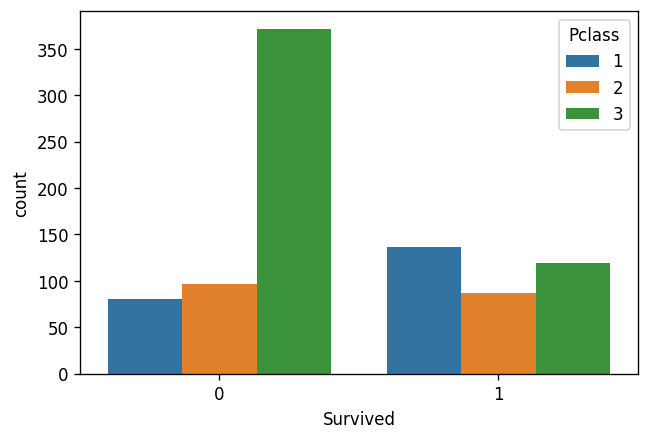

In [38]:
# Survived vs Pclass
plt.figure(dpi=120)
sns.countplot(x="Survived", hue="Pclass", data=titanic)

In [40]:
res = titanic.groupby("Pclass")['Survived'].value_counts()
res

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [45]:
res = titanic.groupby("Pclass")['Survived'].value_counts(normalize = True)
res

Pclass  Survived
1       1           0.629630
        0           0.370370
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: Survived, dtype: float64

In [54]:
print("% survived for class 1: ", res[1][0]*100)
print("% not survived for class 1: ", res[1][1]*100)
print("% survived for class 2: ", res[2]*100)
print("% not survived for class 2: ", res[3]*100)
print("% survived for class 3: ", res[4]*100)
print("% not survived for class 3: ", res[5]*100)

% survived for class 1:  37.03703703703704
% not survived for class 1:  Survived
1    62.962963
0    37.037037
Name: Survived, dtype: float64
% survived for class 2:  Survived
0    52.717391
1    47.282609
Name: Survived, dtype: float64
% not survived for class 2:  Survived
0    75.763747
1    24.236253
Name: Survived, dtype: float64


KeyError: ignored

In [49]:
first_rate = titanic[titanic.Pclass == 1]["Survived"]
print("total survived :",sum(first_rate))
print("total travelled: ",len(first_rate))
print("survival % :", sum(first_rate)/len(first_rate) * 100)

total survived : 136
total travelled:  216
survival % : 62.96296296296296


In [50]:
first_rate = titanic[titanic.Pclass == 2]["Survived"]
print("total survived :",sum(first_rate))
print("total travelled: ",len(first_rate))
print("survival % :", sum(first_rate)/len(first_rate) * 100)

total survived : 87
total travelled:  184
survival % : 47.28260869565217


In [51]:
first_rate = titanic[titanic.Pclass == 3]["Survived"]
print("total survived :",sum(first_rate))
print("total travelled: ",len(first_rate))
print("survival % :", sum(first_rate)/len(first_rate) * 100)

total survived : 119
total travelled:  491
survival % : 24.236252545824847


# Survival based on Embarked

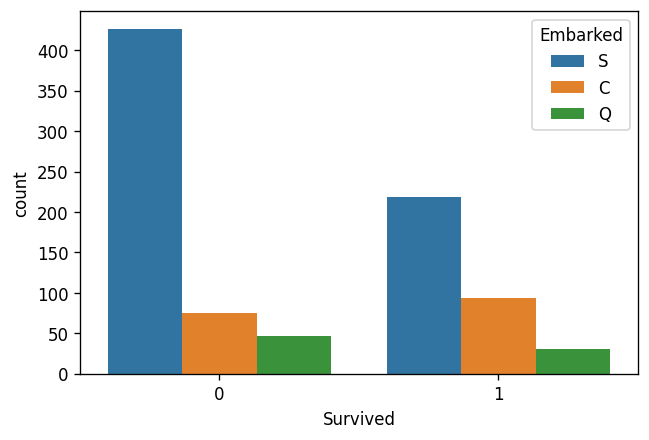

In [52]:
# survived vs embarked
plt.figure(dpi=120)
sns.countplot(x = "Survived", hue="Embarked", data = titanic)

In [56]:
survived = titanic[titanic.Embarked == "S"]["Survived"]
print("S - total survived :",sum(survived))
print("S - total travelled: ",len(survived))
print("S - survival % :", sum(survived)/len(survived) * 100)
print()
survived = titanic[titanic.Embarked == "C"]["Survived"]
print("C - total survived :",sum(survived))
print("C - total travelled: ",len(survived))
print("C - survival % :", sum(survived)/len(survived) * 100)
print()
survived = titanic[titanic.Embarked == "Q"]["Survived"]
print("Q - total survived :",sum(survived))
print("Q - total travelled: ",len(survived))
print("Q - survival % :", sum(survived)/len(survived) * 100)

S - total survived : 219
S - total travelled:  646
S - survival % : 33.90092879256966

C - total survived : 93
C - total travelled:  168
C - survival % : 55.35714285714286

Q - total survived : 30
Q - total travelled:  77
Q - survival % : 38.961038961038966


In [58]:
res = titanic.groupby("Embarked")['Survived'].value_counts()
res

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           219
Name: Survived, dtype: int64

In [59]:
res = titanic.groupby("Embarked")['Survived'].value_counts(normalize = True)
res

Embarked  Survived
C         1           0.553571
          0           0.446429
Q         0           0.610390
          1           0.389610
S         0           0.660991
          1           0.339009
Name: Survived, dtype: float64

# Survival based on SibSp

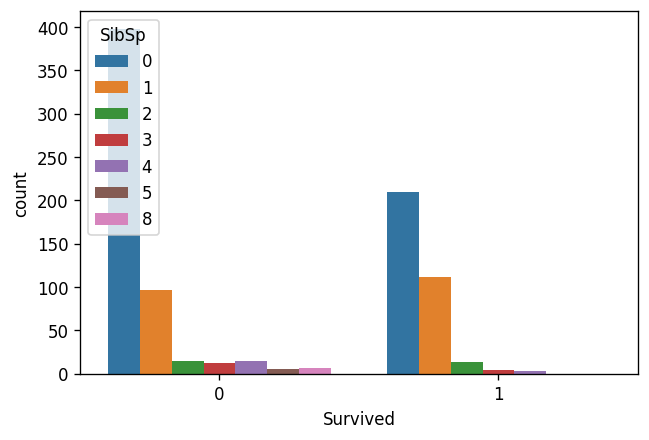

In [60]:
# survived vs SibSp
plt.figure(dpi=120)
sns.countplot(x="Survived", hue="SibSp", data = titanic)

In [61]:
res = titanic.groupby("SibSp")['Survived'].value_counts()
res

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

In [62]:
res = titanic.groupby("SibSp")['Survived'].value_counts(normalize = True)
res

SibSp  Survived
0      0           0.654605
       1           0.345395
1      1           0.535885
       0           0.464115
2      0           0.535714
       1           0.464286
3      0           0.750000
       1           0.250000
4      0           0.833333
       1           0.166667
5      0           1.000000
8      0           1.000000
Name: Survived, dtype: float64

# Survival based on fare

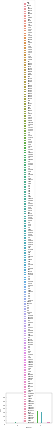

In [64]:
# survived vs fare
plt.figure(dpi=10)
sns.countplot(x="Survived", hue="Fare", data = titanic)

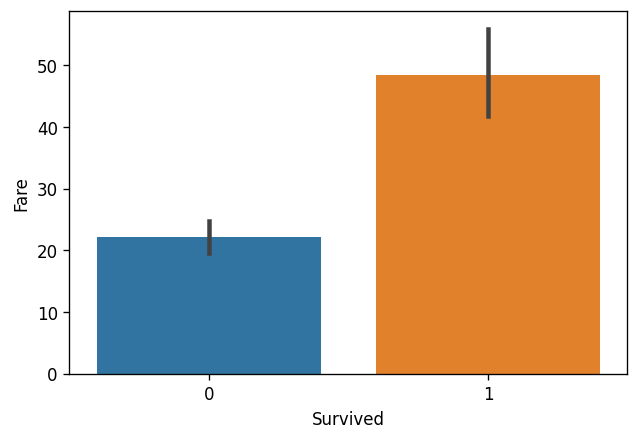

In [66]:
# survived vs fare
plt.figure(dpi=120)
sns.barplot(x="Survived", y="Fare", data = titanic)

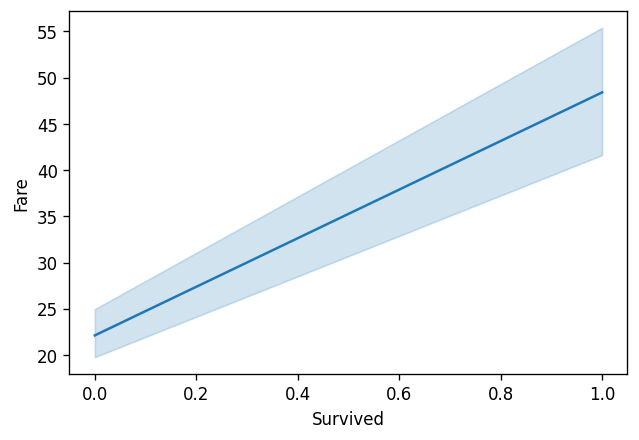

In [68]:
# survived vs fare
plt.figure(dpi=120)
sns.lineplot(x="Survived", y="Fare", data = titanic)

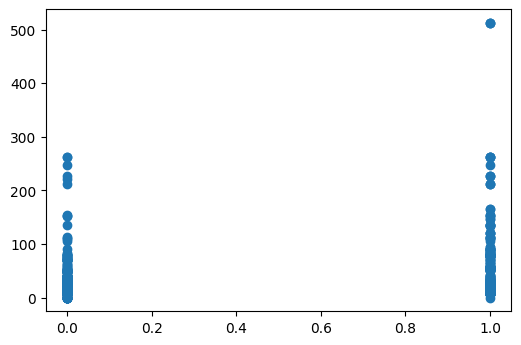

In [71]:
x = titanic["Survived"]
y = titanic["Fare"]
plt.figure(dpi=100)
plt.scatter(x,y)

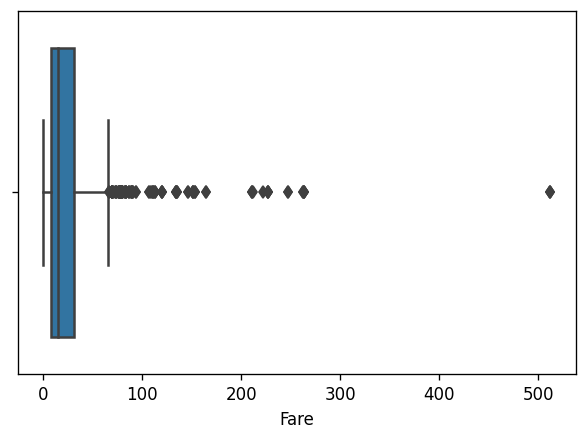

In [75]:
plt.figure(dpi=120)
sns.boxplot(x="Fare", data = titanic)

# Survived vs Age

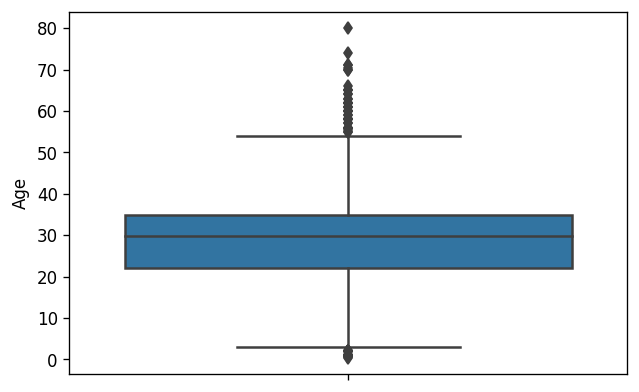

In [77]:
# Survived vs Age
plt.figure(dpi=120)
sns.boxplot(y="Age", data = titanic)

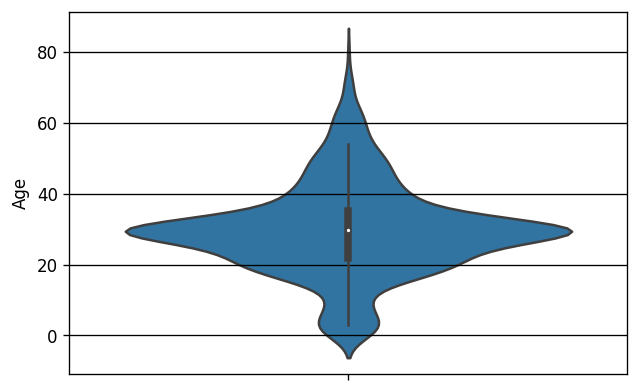

In [80]:
# Survived vs Age
plt.figure(dpi=120)
plt.grid(color="black")
sns.violinplot(y="Age", data = titanic)

In [81]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [82]:
titanic.Age.quantile(0.25)

22.0

In [83]:
titanic.Age.quantile(0.50)

29.69911764705882

In [84]:
titanic.Age.quantile(0.75)

35.0

In [85]:
titanic.groupby(["Sex","Survived"])["Age"].mean()

Sex     Survived
female  0           26.023272
        1           28.979263
male    0           31.175224
        1           27.631705
Name: Age, dtype: float64